<a href="https://colab.research.google.com/github/Priyanshu1620/ai-ml-project_1/blob/main/Brain_Tumor_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Unzipping the dataset
!unzip /content/brain_tumour_dataset.zip

Archive:  /content/brain_tumour_dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import math
import glob

In [7]:
#Count the no. of images in the respective classes 0 - Brain Tumour and 1 - Healthy Brain
ROOT_DIR = '/content/Brain Tumor Data Set/Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


In [8]:
number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

We will split the data in the following manner

*   70% Training data
*   15% Validation data
*   15% Testing data








In [9]:
#Creating a train folder

def dataFolder(p, split):

  if not os.path.exists("./" + p):
    os.mkdir("./" + p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{p} folder exists.")

In [10]:
dataFolder("train",0.7)

In [11]:
dataFolder("val",0.15)

In [12]:
dataFolder("test",0.15)

In [13]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 17), ('Healthy', 16)])

# **Model Build**

In [14]:
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [15]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

# Preparing our data using Data Generator

In [18]:
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True) #data augmentation
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size = 32, class_mode= 'binary')

  return image

In [19]:
path = '/content/train'
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [22]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size = 32, class_mode= 'binary')

  return image

In [23]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [25]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [32]:
#Early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

#earlystopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1,mode = 'auto')

#modelcheckpoint
mc = ModelCheckpoint(monitor = 'val_accuracy',filepath = './bestmodel.keras', save_best_only = True, verbose = 1, mode = 'auto')

cd = [es,mc]

# **Model Training**

In [40]:
hs = model.fit(train_data,
               steps_per_epoch = 8,
               epochs = 30,
               verbose = 1,
               validation_data = val_data,
               validation_steps = 16,
               callbacks = cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7032 - loss: 0.5842
Epoch 1: val_accuracy did not improve from 0.85156
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 586ms/step - accuracy: 0.7058 - loss: 0.5861 - val_accuracy: 0.7891 - val_loss: 0.5938
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.7943 - loss: 0.5818
Epoch 2: val_accuracy did not improve from 0.85156
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.7924 - loss: 0.5768 - val_accuracy: 0.7904 - val_loss: 0.4664
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7351 - loss: 0.5891
Epoch 3: val_accuracy did not improve from 0.85156
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 763ms/step - accuracy: 0.7316 - loss: 0.5905 - val_accuracy: 0.8223 - val_loss: 0.4857
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.7922 - loss: 0.5789
Epoch 4: val_accuracy did not improve from 0.85156
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.7888 - loss: 0.5790 - val_accuracy: 0.8024 - val_loss: 0.5380


In [41]:
#Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

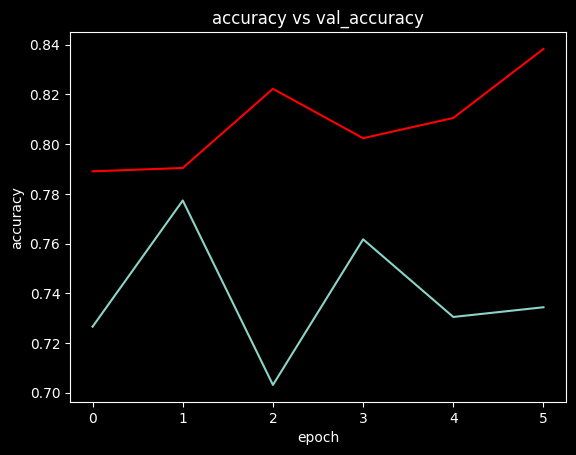

In [42]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("accuracy vs val_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

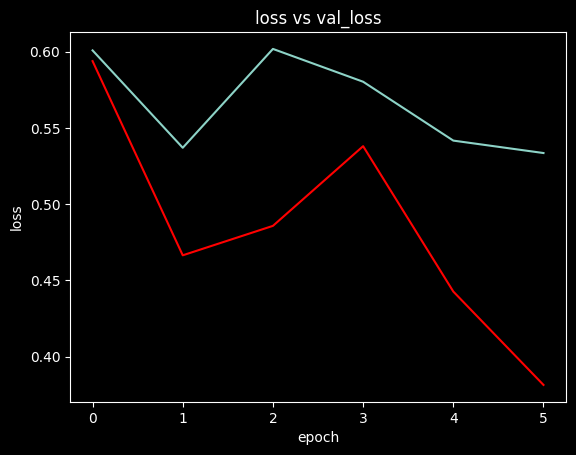

In [43]:
plt.style.use('dark_background')

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [44]:
#Model Accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.keras')

# **Model Accuracy**

In [45]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc*100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8229 - loss: 0.4649
Our model accuracy is 82.91605114936829 %


In [46]:
from keras.preprocessing.image import load_img, img_to_array

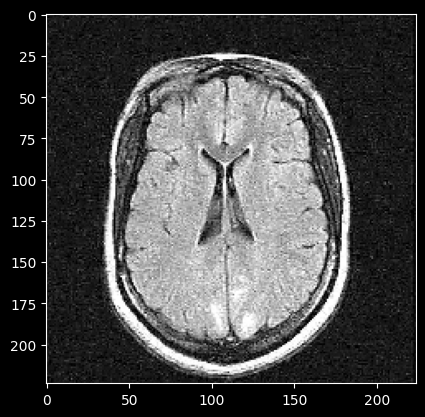

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
No Brain Tumor Detected


In [95]:
path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (842).jpg"
img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255     #normalizing the image

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred <= 0.5:
  print("\033[1mBrain Tumor Detected")
else:
  print("No Brain Tumor Detected\033[0m")